# Wave Equation Implementation:

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

MovieWriter ffmpeg unavailable; using Pillow instead.


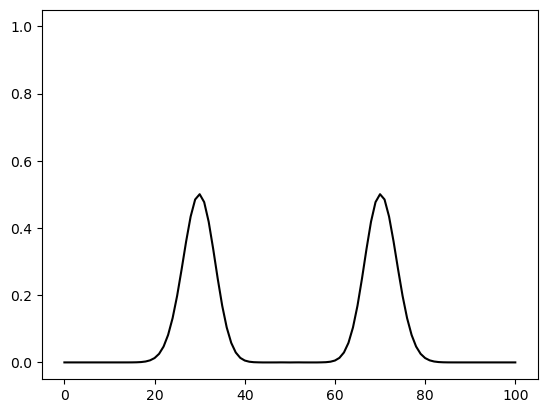

In [30]:
dx=0.1 #space increment
dt=0.05 #time increment
tmin=0.0 #initial time
tmax=2.0 #simulate until
xmin=-5.0 #left bound
xmax=5.0 #right bound...assume packet never reaches boundary
c=1.0 #speed of sound
rsq=(c*dt/dx)**2 #appears in finite diff sol

nx = int((xmax-xmin)/dx) + 1 #number of points on x grid
nt = int((tmax-tmin)/dt) + 2 #number of points on t grid
u = np.zeros((nt,nx)) #solution to WE

#set initial pulse shape
def init_fn(x):
    val = np.exp(-(x**2)/0.25)
    if val<.001:
        return 0.0
    else:
        return val

for a in range(0,nx):
    u[0,a]=init_fn(xmin+a*dx)
    u[1,a]=u[0,a]

#simulate dynamics
for t in range(1,nt-1):
    for a in range(1,nx-1):
        u[t+1,a] = 2*(1-rsq)*u[t,a]-u[t-1,a]+rsq*(u[t,a-1]+u[t,a+1])

fig = plt.figure()
plts = []             # get ready to populate this list the Line artists to be plotted
for i in range(nt):
    p, = plt.plot(u[i,:], 'k')   # this is how you'd plot a single line...
    plts.append( [p] )           # ... but save the line artist for the animation
ani = animation.ArtistAnimation(fig, plts, interval=50, repeat_delay=3000)   # run the animation
ani.save("wave.gif")  # optionally save it to a file

plt.show()